# Credit Score Project 💳 

## 0.0 Documentação 🗒️
>**Autor**: Millena Thalyne <br>
>**Linguagem**: Python <br>
>**Curso**: Cientista de Dados EBAC

### 0.1 Descrição 
O credit score é uma pontuação que mede a credibilidade financeira de uma pessoa com base em seu histórico de pagamentos, dívidas e uso de crédito. Ele serve para prever o risco de inadimplência e auxilia instituições financeiras a decidir sobre a concessão de crédito e definir condições de empréstimos. <br> O projeto que estou iniciando aborda esse tema, utilizando uma base de dados com informações de clientes para desenvolver um modelo preditivo capaz de estimar a probabilidade de um cliente se tornar inadimplente. <br> 
Esse notebook será separado em quatro partes: 
- **Bibliotecas e Leitura de Dados**: Bibliotecas Python utilizadas para rodar esse notebook, juntamente com a leitura da base de dados;
- **Pré-Processamento de Dados**: Realização de tratamento de nulos, tipagem e padronização de dados;
- **Análise de Dados**: Análise univariada das variáveis numéricas, análise bivariada entre duas variáveis a fim de responder algumas perguntas pertinentes nos nossos dados [3.2] e análise de correlação juntamente com a matriz de correlação dos dados em visualização "heatmap" (mapa de calor);
- **Separação de Bases de Treino e Teste**: Padronização de variáveis categóricas utilizando Label e One-Hot Encoders e separação das amostras de treino (70%) e teste (30%) para posterior utilização em modelo de Machine Learning. Além disso, também realizei o balanceamento da classe Credit Score utilizando o método de *Oversampling* SMOTE.

### 0.2 Base de Dados
*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.

## 1.0 Bibliotecas e Leitura de Bases de Treinamento e Teste 📋

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Importando as bases de treino e teste
X_train = pd.read_csv('.\dados\X_train_balanced.csv')
X_test = pd.read_csv('.\dados\X_test.csv')
y_train = pd.read_csv('.\dados\y_train_balanced.csv')
y_test = pd.read_csv('.\dados\y_test.csv')

In [3]:
X_train.head()

,Age,Income,Education,Number of Children,Marital_Single,Gender_Male,Home_Rented
0,45,115000.0,1,3,0,0,0
1,36,135000.0,1,0,0,1,0
2,45,110000.0,1,3,0,0,0
3,36,47500.0,0,0,1,1,1
4,26,40000.0,0,0,1,0,1


In [4]:
y_train.head()

,Credit Score
0,1
1,1
2,1
3,0
4,0


## 2.0 Treinamento do Modelo de Regressão Logística 👾

### 2.1 Aplicação do Grid Search CV 
O GridSearchCV é uma técnica de otimização de modelos que busca automaticamente a melhor combinação de hiperparâmetros. Ele testa várias configurações possíveis definidas em um grid e avalia cada uma por meio de validação cruzada. Ao final, retorna o conjunto de parâmetros que produz o melhor desempenho. É uma forma eficiente e sistemática de melhorar a qualidade do modelo sem depender de tentativas manuais
<br>
Para fazer isso, utilizamos a função GridSearchCV, do Sklearn, para fazer isso de maneira automática.

In [5]:
# Instanciando o modelo de Regressão Logística
modelo = LogisticRegression(random_state=2, max_iter=500)

In [6]:
# Dicionário de hiperparâmetros para Logistic Regression
parametros_busca = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],        # liblinear permite L1 e L2
    "multi_class": ["ovr"]          # evitar FutureWarning
}

# Instanciando o GridSearchCV
grid_search = GridSearchCV(
    estimator=modelo,
    param_grid=parametros_busca,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

# Treinando GridSearchCV com as bases de treino
grid_search.fit(X_train, y_train)

# Verificando resultado
grid_search.cv_results_

g:\Meu Drive\Estudos\Estudos EBAC\Profissão Cientista de Dados\Tarefas\Módulo 18 - Tarefa 17\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
g:\Meu Drive\Estudos\Estudos EBAC\Profissão Cientista de Dados\Tarefas\Módulo 18 - Tarefa 17\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
g:\Meu Drive\Estudos\Estudos EBAC\Profissão Cientista de Dados\Tarefas\Módulo 18 - Tarefa 17\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use ano

{'mean_fit_time': array([0.14454492, 0.21934414, 0.22324173, 0.15633678, 0.18073924,
        0.07464425, 0.00824205, 0.00572658]),
 'std_fit_time': array([0.02182472, 0.04157947, 0.06532212, 0.03493158, 0.06874812,
        0.09339944, 0.00085245, 0.00023991]),
 'mean_score_time': array([0.01799679, 0.01781209, 0.01597436, 0.01479212, 0.01428835,
        0.00958331, 0.00608333, 0.008588  ]),
 'std_score_time': array([0.00046395, 0.00250354, 0.00084741, 0.00171133, 0.00311362,
        0.0054428 , 0.00040769, 0.00147815]),
 'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1.0, 1.0, 10.0, 10.0],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=1e+20),
 'param_multi_class': masked_array(data=['ovr', 'ovr', 'ovr', 'ovr', 'ovr', 'ovr', 'ovr', 'ovr'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2

In [7]:
# Selecionando features com SelectFromModel com o melhor estimador do GridSearchCV
modelo_fselecionadas = SelectFromModel(grid_search.best_estimator_, max_features=10,prefit=True)

In [8]:
# Criando X_Treino e X_Teste a partir do novo selecionador de feature
X_treino_selecionado = modelo_fselecionadas.transform(X_train)
X_teste_selecionado = modelo_fselecionadas.transform(X_test)

g:\Meu Drive\Estudos\Estudos EBAC\Profissão Cientista de Dados\Tarefas\Módulo 18 - Tarefa 17\venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
g:\Meu Drive\Estudos\Estudos EBAC\Profissão Cientista de Dados\Tarefas\Módulo 18 - Tarefa 17\venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


### 2.2 Treinando Modelo com os Estimadores do GridSearchCV
Novamente aplica-se o fit com o melhor estimador do GridSearchCV. Para isso, criamos o modelo igual a grid_search.best_estimator_ e treinamos o modelo

In [ ]:
# Aplicando o melhor estimador no modelo e o treinando
modelo = grid_search.best_estimator_
modelo.fit(X_treino_selecionado, y_train)

# Imprimindo o Score para o novo estimador
modelo.score(X_teste_selecionado, y_test)

g:\Meu Drive\Estudos\Estudos EBAC\Profissão Cientista de Dados\Tarefas\Módulo 18 - Tarefa 17\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
g:\Meu Drive\Estudos\Estudos EBAC\Profissão Cientista de Dados\Tarefas\Módulo 18 - Tarefa 17\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
g:\Meu Drive\Estudos\Estudos EBAC\Profissão Cientista de Dados\Tarefas\Módulo 18 - Tarefa 17\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use ano

0.92

### 2.3 Aplicação do RFE
O RFE (Recursive Feature Elimination) é um método de seleção de features que identifica quais variáveis mais contribuem para o desempenho do modelo. Ele funciona removendo, de forma iterativa, as features menos importantes e treinando novamente o modelo a cada etapa. Ao final, o RFE mantém apenas as variáveis mais relevantes, reduzindo complexidade, aumentando interpretabilidade e podendo melhorar a performance do modelo.

In [10]:
# Resgatando os melhores parâmetros para nosso modelo a partir do Grid Search
parametros = grid_search.best_params_

# Instanciando o modelo de Regressão Logística com os melhores parâmetros
modelo_RFE = LogisticRegression(**parametros)

In [11]:
selecionador = RFE(modelo_RFE, n_features_to_select=10, step=1)

In [12]:
# Treinando o RFE 
selecionador.fit(X_train, y_train)

# Transformando os dados de treino e teste reajustados
X_treino_selecionado_RFE = selecionador.transform(X_train)
X_teste_selecionado_RFE = selecionador.transform(X_test)

g:\Meu Drive\Estudos\Estudos EBAC\Profissão Cientista de Dados\Tarefas\Módulo 18 - Tarefa 17\venv\Lib\site-packages\sklearn\feature_selection\_rfe.py:300: UserWarning: Found n_features_to_select=10 > n_features=7. There will be no feature selection and all features will be kept.
  warnings.warn(
g:\Meu Drive\Estudos\Estudos EBAC\Profissão Cientista de Dados\Tarefas\Módulo 18 - Tarefa 17\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
g:\Meu Drive\Estudos\Estudos EBAC\Profissão Cientista de Dados\Tarefas\Módulo 18 - Tarefa 17\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.

In [13]:
# Aplicando os dados selecionados ao modelo
modelo_RFE.fit(X_treino_selecionado_RFE, y_train)

# Avaliando desempenho do modelo
modelo_RFE.score(X_teste_selecionado_RFE, y_test)

g:\Meu Drive\Estudos\Estudos EBAC\Profissão Cientista de Dados\Tarefas\Módulo 18 - Tarefa 17\venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
g:\Meu Drive\Estudos\Estudos EBAC\Profissão Cientista de Dados\Tarefas\Módulo 18 - Tarefa 17\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
g:\Meu Drive\Estudos\Estudos EBAC\Profissão Cientista de Dados\Tarefas\Módulo 18 - Tarefa 17\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use ano

0.92

## 3.0 Avaliando Modelo ✍🏻
Nos passos anteriores, verificamos que o Score do modelo deu 92%, ou seja, de um modo geral, o modelo está acertando 92% dos dados de teste, o que é uma porcentagem muito alta. <br>
Porém, não somente esse critério de avaliação é bom para averiguar a precisão de um modelo, portanto, ver-se necessário utilizar outras métricas estatísticas, tais como: Acurácia e Matriz Confusão, que serão as utilizadas nos próximos passos. <br>

In [14]:
# Constuindo y_pred
y_pred = modelo.predict(X_teste_selecionado)
y_prob = modelo.predict_proba(X_test)[:, 1]

g:\Meu Drive\Estudos\Estudos EBAC\Profissão Cientista de Dados\Tarefas\Módulo 18 - Tarefa 17\venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Acurácia
acc = accuracy_score(y_test, y_pred)

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)


# Classification Report (Prec, Recall, F1)
report = classification_report(y_test, y_pred)

print("=== Métricas de Avaliação ===")
print(f"Acurácia: {acc:.4f}")
print("\nClassification Report:")
print(report)
print("Matriz de Confusão:")
print(cm)

=== Métricas de Avaliação ===
Acurácia: 0.9200
ROC-AUC: 0.9419

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.94      0.94      0.94        32
           2       1.00      1.00      1.00         7

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50

Matriz de Confusão:
[[ 9  2  0]
 [ 2 30  0]
 [ 0  0  7]]


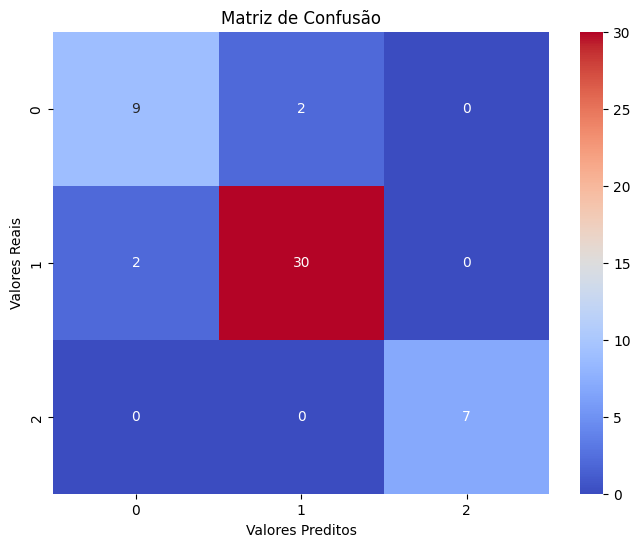

In [ ]:
# Plotando a Matriz de Confusão
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d')
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

## 4.0 Conclusão 📝

O modelo apresentou um desempenho bastante satisfatório. A acurácia geral de 92% indica que a grande maioria das previsões foi correta, enquanto o ROC-AUC de 0.94 reforça a capacidade do modelo em distinguir bem as classes. As métricas por classe mostram resultados consistentes: a classe 1, majoritária, atingiu 94% de precisão e recall; a classe 0 manteve bom equilíbrio (82% em todas as métricas); e a classe 2 obteve desempenho perfeito, com 100% de acerto. A matriz de confusão confirma que os erros foram poucos e concentrados apenas entre as classes 0 e 1, sem impacto significativo na performance geral. Esses resultados mostram que o modelo é robusto e generaliza bem para os dados.